<a href="https://colab.research.google.com/github/it-ces/Analytics-puj/blob/main/Work1_analytics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!git clone https://github.com/it-ces/Analytics-puj.git
%cd "Analytics-puj"
%env OMP_NUM_THREADS = 4

fatal: destination path 'Analytics-puj' already exists and is not an empty directory.
/content/Analytics-puj/Analytics-puj/Analytics-puj/Analytics-puj/Analytics-puj/Analytics-puj
env: OMP_NUM_THREADS=4


In [47]:
import pandas as pd
import numpy as np
import Models
import EDA
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [48]:
df  = pd.read_csv("https://raw.githubusercontent.com/it-ces/Analytics-puj/main/03%20CSV%20data%20--%20STC(A)_numerical%20dates.csv")
df.head()

,ID,Program.Code,From.Grade,To.Grade,Group.State,Is.Non.Annual.,Days,Travel.Type,Departure.Date,Return.Date,...,GroupGradeTypeLow,GroupGradeTypeHigh,GroupGradeType,MajorProgramCode,SingleGradeTripFlag,FPP.to.School.enrollment,FPP.to.PAX,Num.of.Non_FPP.PAX,SchoolSizeIndicator,Retained.in.2012.
0,1,HS,4.0,4.0,CA,0,1,A,40557,40557,...,K,Elementary,K->Elementary,H,1,0.063646,0.936508,4,L,1
1,2,HC,8.0,8.0,AZ,0,7,A,40557,40564,...,Middle,Middle,Middle->Middle,H,1,0.025882,0.880000,3,L,1
2,3,HD,8.0,8.0,FL,0,3,A,40558,40560,...,Middle,Middle,Middle->Middle,H,1,0.025131,0.888889,3,L,1
3,4,HN,9.0,12.0,VA,1,3,B,40558,40560,...,Undefined,Undefined,Undefined->Undefined,H,0,NaN,1.000000,0,NaN,0
4,5,HD,6.0,8.0,FL,0,6,T,40559,40564,...,Middle,Middle,Middle->Middle,H,0,0.112500,0.910112,8,M-L,0


In [49]:
# Missign values...
pd.DataFrame(df).isna().sum()

ID                                   0
Program.Code                         0
From.Grade                         127
To.Grade                           150
Group.State                          0
Is.Non.Annual.                       0
Days                                 0
Travel.Type                          0
Departure.Date                       0
Return.Date                          0
Deposit.Date                         0
Special.Pay                       1919
Tuition                              0
FRP.Active                           0
FRP.Cancelled                        0
FRP.Take.up.percent.                 0
Early.RPL                          673
Latest.RPL                          19
Cancelled.Pax                        0
Total.Discount.Pax                   0
Initial.System.Date                  8
Poverty.Code                       599
Region                               0
CRM.Segment                          4
School.Type                          0
Parent.Meeting.Flag      

In [50]:
df.dropna(inplace=True)

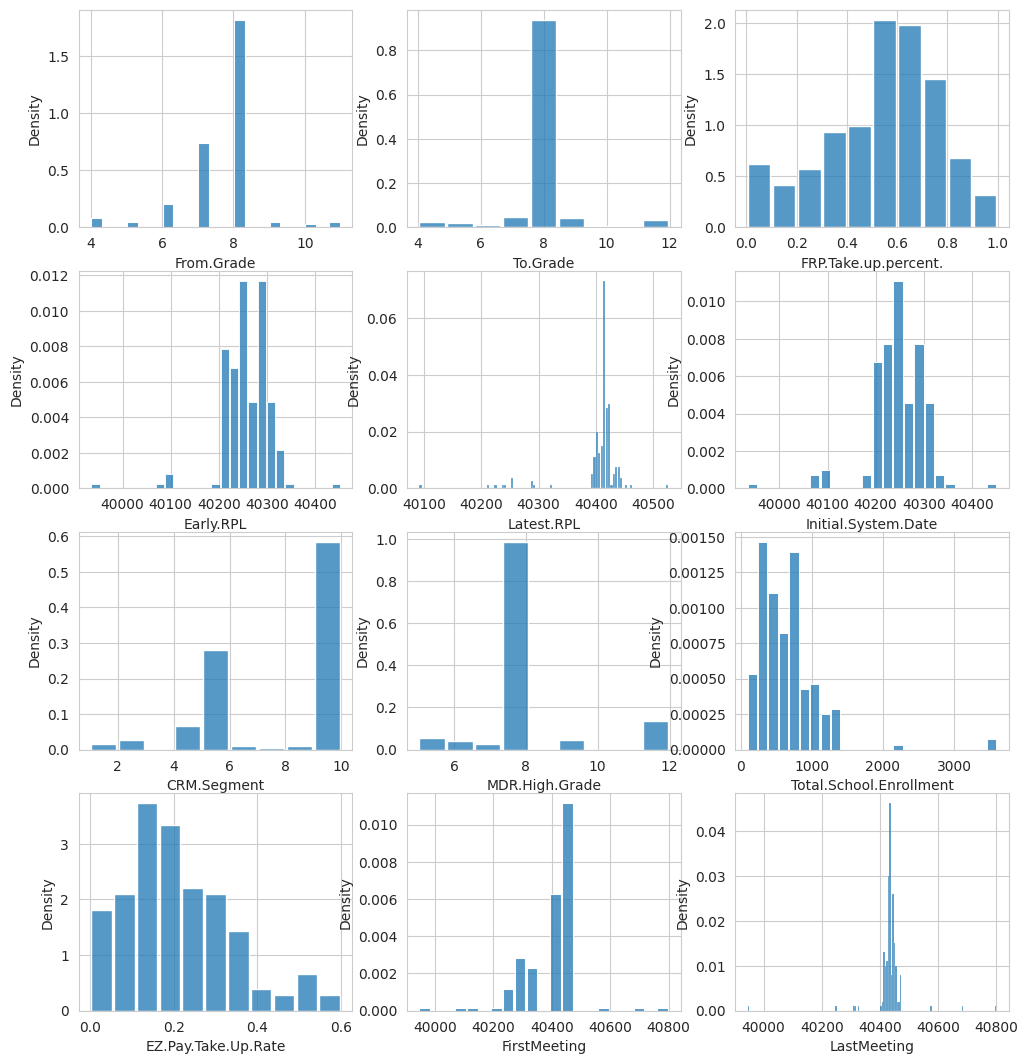

In [51]:
EDA.histogram_plot(df)

{0: 'From.Grade', 1: 'To.Grade', 2: 'FRP.Take.up.percent.', 3: 'Early.RPL', 4: 'Latest.RPL', 5: 'Initial.System.Date', 6: 'CRM.Segment', 7: 'MDR.High.Grade', 8: 'Total.School.Enrollment', 9: 'EZ.Pay.Take.Up.Rate', 10: 'FirstMeeting', 11: 'LastMeeting'}


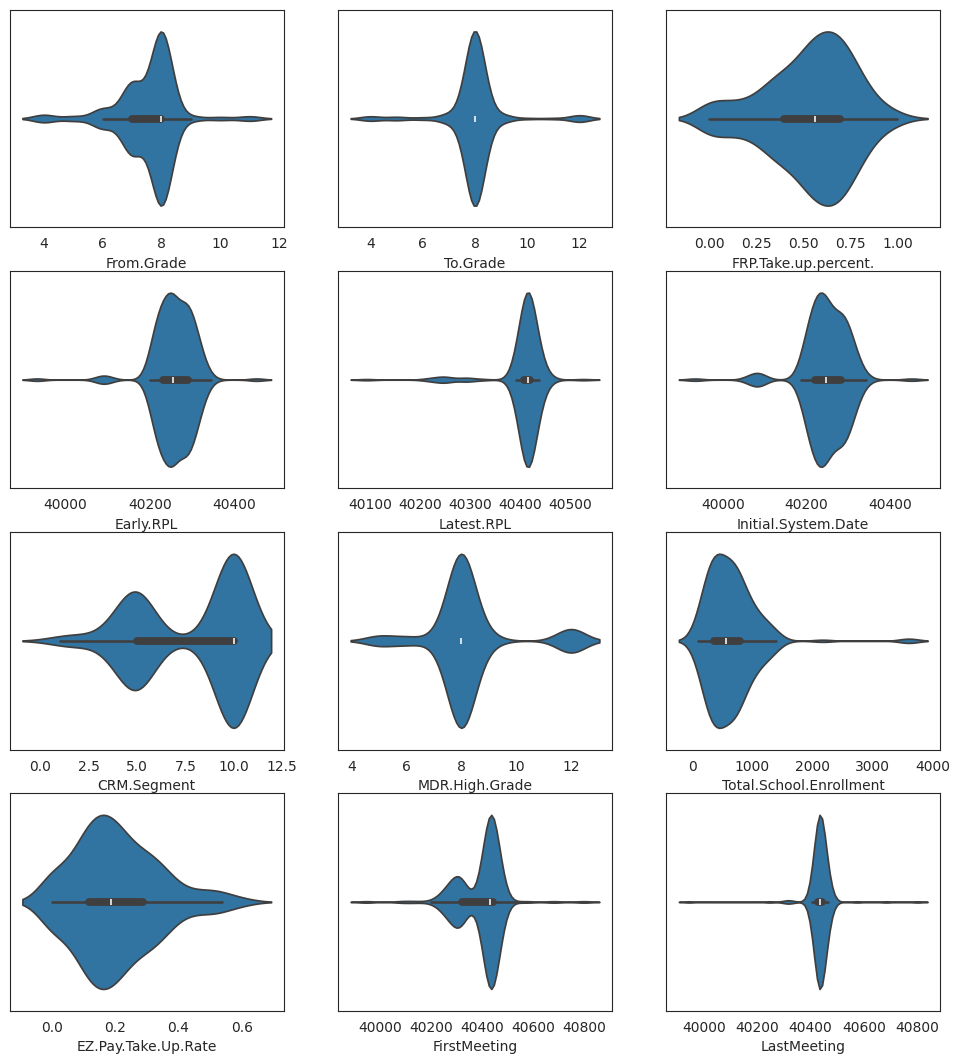

In [52]:
EDA.violins(df)

In [53]:
# Modelling
y,X =  df['Retained.in.2012.'] , df.drop(columns = 'Retained.in.2012.')
X = df[["FPP.to.PAX"]]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, stratify=y)

In [54]:
# KNN modellíng

#Maximizar ambas clases
best_model = Models.grid_KNN(X_train, y_train, 'roc_auc')
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))


# Máximizar la clase 1
best_model = Models.grid_KNN(X_train, y_train, 'recall')
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))


              precision    recall  f1-score   support

           0       0.18      0.18      0.18        11
           1       0.68      0.68      0.68        28

    accuracy                           0.54        39
   macro avg       0.43      0.43      0.43        39
weighted avg       0.54      0.54      0.54        39

              precision    recall  f1-score   support

           0       0.33      0.18      0.24        11
           1       0.73      0.86      0.79        28

    accuracy                           0.67        39
   macro avg       0.53      0.52      0.51        39
weighted avg       0.62      0.67      0.63        39



In [55]:
# Máximizar la clase 1
best_model = Models.grid_lr(X_train, y_train)
preds = best_model.predict(X_test)
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.72      1.00      0.84        28

    accuracy                           0.72        39
   macro avg       0.36      0.50      0.42        39
weighted avg       0.52      0.72      0.60        39



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
